In [1]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('bank-full.csv',delimiter=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
len(df)

45211

In [4]:
df['previous'] = ['unknown' if x == 999 else x for x in df['contact']]

for i in df.columns:
    if 'unknown' in (df[str(i)].unique()):
        print(i)

job
education
contact
previous
poutcome


C:\Users\brand\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [5]:
job_unknown = len(df[df.job =='unknown'])
education_unknown = len(df[df.education == 'unknown'])
contact_unknown = len(df[df.contact == 'unknown'])
previous_unknown = len(df[df.previous == 'unknown'])
poutcome_unknown = len(df[df.poutcome == 'unknown'])

print('job unknown is: '+str(job_unknown))
print('education unknown is: '+str(education_unknown))
print('contact unknown is: '+str(contact_unknown))
print('previous unknown is: '+str(previous_unknown))
print('poutcome unknown is: '+str(poutcome_unknown))

job unknown is: 288
education unknown is: 1857
contact unknown is: 13020
previous unknown is: 13020
poutcome unknown is: 36959


In [6]:
df = df[(df.job != 'unknown') & (df.education != 'unknown')].drop(columns=['contact','poutcome','duration','previous'])

In [7]:
job_unknown = len(df[df.job =='unknown'])
education_unknown = len(df[df.education == 'unknown'])

print('job unknown is: '+str(job_unknown))
print('education unknown is: '+str(education_unknown))

job unknown is: 0
education unknown is: 0


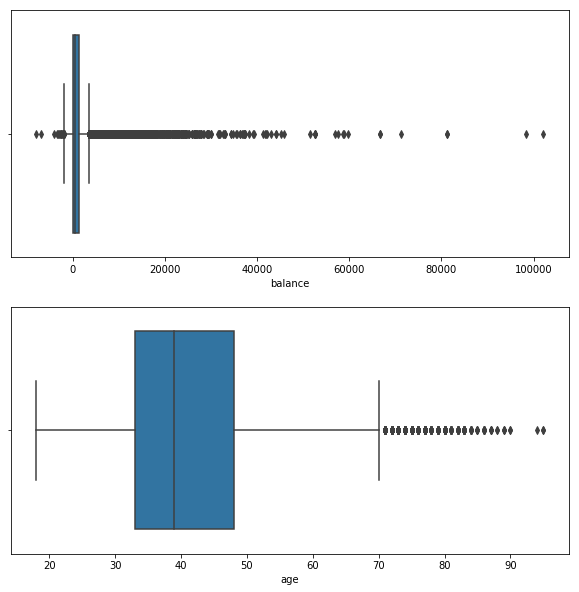

In [21]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.boxplot(x=df['balance'])

plt.subplot(2,1,2)
sns.boxplot(x=df['age'])

In [9]:
le = preprocessing.LabelEncoder()

In [10]:
for feature in df.columns:
    if str(type(df[str(feature)][0])) == "<class 'numpy.int64'>":
        df[feature+'_norm'] = np.array([((i-df[feature].min())/(df[feature].max()-df[feature].min())) for i in df[feature]])
    else:
        encoded = le.fit_transform(df[feature])
        df[feature+'_norm'] = np.array([((i-encoded.min())/(encoded.max()-encoded.min())) for i in encoded])

In [11]:
feat_1 = df[['age_norm','job_norm','marital_norm','education_norm','default_norm','housing_norm','loan_norm','month_norm'
             ,'balance_norm','day_norm']]
target = df['y']

training_data_1 ,validation_data_1, training_label, validation_label = train_test_split(feat_1,target,train_size=0.8,
                                                                       test_size=0.2, random_state=1)

In [12]:
accuracy_model_1 = []

for k in range(1,101):
    model_1 = KNeighborsClassifier(n_neighbors=k)
    model_1.fit(training_data_1,training_label)
    accuracy_model_1.append(model_1.score(validation_data_1,validation_label))

In [13]:
print('highest k-score: ' +str(accuracy_model_1.index(max(accuracy_model_1))+1))
print('best accuracy score: '+ str(max(accuracy_model_1)))

highest k-score: 6
best accuracy score: 0.8843616159277694


In [14]:
feat_2 = df[['job_norm','marital_norm','default_norm']]
training_data_2 ,validation_data_2, training_label, validation_label = train_test_split(feat_2,target,train_size=0.8,
                                                                                        test_size=0.2, random_state=1) 

In [15]:
accuracy_model_2 = []

for k in range(1,101):
    model_2 = KNeighborsClassifier(n_neighbors=k)
    model_2.fit(training_data_2,training_label)
    accuracy_model_2.append(model_2.score(validation_data_2,validation_label))
    
print('highest k-score: ' +str(accuracy_model_2.index(max(accuracy_model_2))+1))
print('best accuracy score: '+ str(max(accuracy_model_2)))

highest k-score: 10
best accuracy score: 0.8835513369602963


In [16]:
df_z = pd.read_csv('bank-full.csv',delimiter=';')
df_z = df_z[(df_z.job != 'unknown') & (df_z.education != 'unknown')].drop(columns=['contact','poutcome','duration'])

for feature in df_z.columns:
    if str(type(df_z[str(feature)][0])) == "<class 'numpy.int64'>":
        df_z[feature+'_norm_z'] = np.array([((i-df_z[feature].mean())/df_z[feature].std()) for i in df_z[feature]])
    else:
        encoded = le.fit_transform(df_z[feature])
        df_z[feature+'_norm_z'] = np.array([((i-encoded.mean())/encoded.std()) for i in encoded])

In [17]:
feat_3 = df_z[['age_norm_z','job_norm_z','marital_norm_z','education_norm_z','default_norm_z','balance_norm_z','housing_norm_z',
               'loan_norm_z','day_norm_z','month_norm_z','campaign_norm_z','pdays_norm_z']]
target_z = df_z['y']
training_data_3 ,validation_data_3, training_label_z, validation_label_z = train_test_split(feat_3,target_z,train_size=0.8,
                                                                                            test_size=0.2, random_state=1) 

In [18]:
accuracy_model_3 = []

for k in range(1,101):
    model_3 = KNeighborsClassifier(n_neighbors=k)
    model_3.fit(training_data_3,training_label_z)
    accuracy_model_3.append(model_3.score(validation_data_3,validation_label_z))
    
print('highest k-score: ' +str(accuracy_model_3.index(max(accuracy_model_3))+1))
print('best accuracy score: '+ str(max(accuracy_model_3)))

highest k-score: 18
best accuracy score: 0.8852876490334529


In [19]:
feat_4 = df_z[['job_norm_z','marital_norm_z','default_norm_z']]
target_z = df_z['y']
training_data_4 ,validation_data_4, training_label_z, validation_label_z = train_test_split(feat_4,target_z,train_size=0.8,
                                                                                            test_size=0.2, random_state=1) 

In [20]:
accuracy_model_4 = []

for k in range(1,101):
    model_4 = KNeighborsClassifier(n_neighbors=k)
    model_4.fit(training_data_4,training_label_z)
    accuracy_model_4.append(model_4.score(validation_data_4,validation_label_z))
    
print('highest k-score: ' +str(accuracy_model_4.index(max(accuracy_model_4))+1))
print('best accuracy score: '+ str(max(accuracy_model_4)))

highest k-score: 2
best accuracy score: 0.8835513369602963
